[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/2.2.%20KRX%20%EC%A0%84%EC%B2%B4%20%EC%A2%85%EB%AA%A9%EB%B6%84%EC%84%9D-input.ipynb)

## 한국거래소(KRX) 전체 종목 분석
* Pandas cheat sheet 를 함께 보세요! : [Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

* FinanceDataReader를 통한 KRX 전체 종목 수집
    * to_csv("파일명", index=False) : csv 파일로 저장하기
    * read_csv("파일명") : csv 파일 불러오기
    
* Pandas를 통한 파일 저장과 불러오기
    * shape를 통한 행과 열의 수 보기
    * head, tail, sample 을 통한 일부 데이터 가져오기
    
* DataFrame의 info(), describe() 등을 통한 요약과 기술통계 값 구하기
    * info()
    * describe()
    * nunique()
    * index
    * columns
    * values
    
* Pandas의  DataFrame과 Series의 이해
    * Series : 1차원 벡터구조
    * DataFrame : 2차원 행렬구조
    
* 색인하기
    * [컬럼]
    * .loc[행]
    * .loc[행, 열]
    * .loc[조건식, 열]
    
* DataFrame의 데이터 타입 이해하기
    * 날짜 데이터의 변환
    
* DataFrame 다루기
    * 열(column) 인덱싱
    * 행(index) 인덱싱
    * 행, 열 인덱싱
    * 정렬하기 : sort_values 사용하기
    * 조건식 사용하기

* 빈도수 구하기
    * 한 개의 변수 : series.value_counts()
    * 두 개의 변수 : pd.crosstab()

* groupby 와 pivot_table
    * 다양한 연산식의 사용


## ⚠️ 주의할 점 ⚠️ 
* 강좌의 분석내용과 여러분의 실습 결과는 시점의 차이로 빈도수 등의 결과값이 다르게 나옵니다.



## 라이브러리 불러오기

In [3]:
# 데이터 분석을 위해 pandas, 시각화를 위해 seaborn 불러오기
import pandas as pd
import seaborn as sns

## FinanceDataReader 로 수집한 전체 종목 불러오기

* 한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리

* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)
* https://pandas-datareader.readthedocs.io/en/latest/readers/index.html

<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

## <font color="red">종목명이 영문으로 표기될 때</font>

해당 수업은 실시간으로 한국거래소에서 FinanceDataReader 라는 라이브러리를 통해 데이터를 받아오고 있습니다.
아래 링크에 있는 라이브러리의 소스코드가 KRX 전체 종목을 가져오는 소스코드입니다.

[FinanceDataReader/listing.py at master · FinanceData/FinanceDataReader](https://github.com/FinanceData/FinanceDataReader/blob/master/krx/listing.py)

이 때, 전체 상장종목과 거래할 수 있는 ETF 등의 종목도 함께 가져오게 되는데,
FinanceDataReader 에서는 코스피, 코스닥, 코넥스 정보가 있는 엑셀파일과 금융상품 정보가 있는 JSON 데이터를 가져와서 병합하는 형태로 데이터를 제공하고 있습니다.
그런데 최근 JSON 데이터의 종목명이 영문으로 변경되어 제공되고 있음을 확인했습니다.
그래서 아래의 엑셀 데이터를 read_html 로 읽어오게 되면 한글로 된 종목명을 받아서 분석해 보실 수 있습니다.

In [4]:
# # 종목명이 영문으로 표기 될 때 아래의 주석을 풀고 데이터를 받아서 분석해 보세요!
# url = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13'
# df_listing = pd.read_html(url, header=0)[0]
# cols_ren = {'회사명':'Name', '종목코드':'Symbol', '업종':'Sector', '주요제품':'Industry', 
#                     '상장일':'ListingDate', '결산월':'SettleMonth',  '대표자명':'Representative', 
#                     '홈페이지':'HomePage', '지역':'Region', }
# df = df_listing.rename(columns = cols_ren)
# df['Symbol'] = df['Symbol'].apply(lambda x: '{:06d}'.format(x))
# df['ListingDate'] = pd.to_datetime(df['ListingDate'])
# df

In [5]:
# 이전 강좌에서 to_csv로 저장해둔 krx.csv 파일을 pd.read_csv 로 불러옵니다.
df = pd.read_csv("krx.csv", dtype={"Symbol":object})
df.shape

(6603, 10)

### 일부 데이터만 가져오기

{'회사명':'Name', '종목코드':'Symbol', '업종':'Sector', '주요제품':'Industry', 
                            '상장일':'ListingDate', '결산월':'SettleMonth',  '대표자명':'Representative', 
                            '홈페이지':'HomePage', '지역':'Region', }

In [6]:
# head 로 위에 있는 데이터 일부만 가져옵니다.
df.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [7]:
# tail 로 아래 있는 데이터 일부만 가져옵니다.
df.tail()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
6598,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6599,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6600,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
6601,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시
6602,238490,KOSDAQ,힘스,특수 목적용 기계 제조업,"OLED Mask 인장기, OLED Mask 검사기 등",2017-07-20,12월,김주환,http://www.hims.co.kr,인천광역시


In [8]:
# sample을 사용하면 랜덤하게 ()안의 갯수만큼 가져옵니다. 
# ()안에 값을 써주지 않으면 한 개만 가져옵니다.
df.sample()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
3117,52GQ85,KOSPI,미래GQ85LG화학콜,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 데이터 요약하기

In [9]:
# info 로 요약 데이터를 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Symbol          6603 non-null   object
 1   Market          6603 non-null   object
 2   Name            6603 non-null   object
 3   Sector          2485 non-null   object
 4   Industry        2467 non-null   object
 5   ListingDate     2485 non-null   object
 6   SettleMonth     2485 non-null   object
 7   Representative  2485 non-null   object
 8   HomePage        2336 non-null   object
 9   Region          2485 non-null   object
dtypes: object(10)
memory usage: 516.0+ KB


In [10]:
# describe 로 기술통계값을 봅니다.
df.describe()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,6603,6603,6603,2485,2467,2485,2485,2485,2336,2485
unique,6603,3,6603,161,2314,1840,9,2360,2314,22
top,060310,KOSPI,3S,소프트웨어 개발 및 공급업,기업인수합병,1976-06-30,12월,-,http://www.nhreits.com,서울특별시
freq,1,4920,1,152,26,8,2423,5,2,1011


In [11]:
# 중복을 제외한 unique 값의 갯수를 봅니다.
df.nunique()

Symbol            6603
Market               3
Name              6603
Sector             161
Industry          2314
ListingDate       1840
SettleMonth          9
Representative    2360
HomePage          2314
Region              22
dtype: int64

In [12]:
# index 값 보기
df.index

RangeIndex(start=0, stop=6603, step=1)

In [13]:
# 컬럼값 보기
df.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [14]:
# 값만 보기
df.values

array([['060310', 'KOSDAQ', '3S', ..., '박종익, 김세완 (각자 대표이사)',
        'http://www.3sref.com', '서울특별시'],
       ['095570', 'KOSPI', 'AJ네트웍스', ..., '박대현',
        'http://www.ajnet.co.kr', '서울특별시'],
       ['006840', 'KOSPI', 'AK홀딩스', ..., '채형석, 이석주(각자 대표이사)',
        'http://www.aekyunggroup.co.kr', '서울특별시'],
       ...,
       ['003280', 'KOSPI', '흥아해운', ..., '이환구', 'http://www.heung-a.com',
        '서울특별시'],
       ['037440', 'KOSDAQ', '희림', ..., '정영균, 이목운, 허철호 (각자대표)',
        'http://www.heerim.com', '서울특별시'],
       ['238490', 'KOSDAQ', '힘스', ..., '김주환', 'http://www.hims.co.kr',
        '인천광역시']], dtype=object)

## 데이터 색인하기

### Series
<img src="https://pandas.pydata.org/docs/_images/01_table_series.svg">

In [15]:
# Name 컬럼 하나만 가져옵니다.
df["Name"]

0            3S
1        AJ네트웍스
2         AK홀딩스
3        APS홀딩스
4         AP시스템
         ...   
6598    흥국화재2우B
6599      흥국화재우
6600       흥아해운
6601         희림
6602         힘스
Name: Name, Length: 6603, dtype: object

In [16]:
# df["Name"] 의 type을 봅니다.
type(df["Name"])

pandas.core.series.Series

In [17]:
# 0번째 행만 가져옵니다. 행인덱스를 가져올때는 .loc를 사용합니다.
# loc는 위치(locate)를 의미합니다.
df.loc[0]

Symbol                          060310
Market                          KOSDAQ
Name                                3S
Sector                        전자부품 제조업
Industry                   반도체 웨이퍼 캐리어
ListingDate                 2002-04-23
SettleMonth                        03월
Representative      박종익, 김세완 (각자 대표이사)
HomePage          http://www.3sref.com
Region                           서울특별시
Name: 0, dtype: object

In [18]:
# df.loc[0] 의 type을 봅니다.
type(df.loc[0])

pandas.core.series.Series

### DataFrame
<img src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg">

In [19]:
# df 변수의 타입을 봅니다.
type(df)

pandas.core.frame.DataFrame

In [20]:
# 여러 컬럼을 지정할 때는 리스트 형태로 묶어주어야 합니다. 
# 2차원 행렬은 대괄호가 [] 2개가 있다는 것을 기억해 주세요. 
df[["Symbol","Name"]]

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템
...,...,...
6598,000547,흥국화재2우B
6599,000545,흥국화재우
6600,003280,흥아해운
6601,037440,희림


In [21]:
# 여러 개의 행을 가져올 때도 [] 대괄호를 통해 리스트 형태로 묶어줍니다.
df.loc[[0, 1, 2, 5]]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시


In [22]:
# 1개의 컬럼을 가져올 때도 대괄호[] 2개를 써서 리스트 형태로 묶어주게 되면 데이터프레임 형태로 반환됩니다.
# "Name" 을 데이터프레임으로 가져옵니다.
df[["Name"]]

,Name
0,3S
1,AJ네트웍스
2,AK홀딩스
3,APS홀딩스
4,AP시스템
...,...
6598,흥국화재2우B
6599,흥국화재우
6600,흥아해운
6601,희림


### loc를 통한 서브셋 가져오기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/03_subset_columns_rows.svg">

In [23]:
# 행과 열 함께 가져오기
# .loc[행, 열]
df.loc[3, "Name"]

'APS홀딩스'

In [24]:
# .loc[행, 열]
df.loc[1]["Name"]

'AJ네트웍스'

In [25]:
# %timeit
%timeit df.loc[3, "Name"]

9.33 µs ± 742 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [26]:
# %timeit
%timeit df.loc[3]["Name"]

61.8 µs ± 5.49 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [27]:
# 여러 개의 행과 하나의 컬럼 가져오기
# .loc[행, 열]
df.loc[[0, 1, 2], "Name"]

0        3S
1    AJ네트웍스
2     AK홀딩스
Name: Name, dtype: object

In [28]:
# 여러개의 행과 여러 개의 컬럼 가져오기
# .loc[행, 열]
df.loc[[0, 1, 2], ["Name", "Symbol"]]

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840


### Boolean Indexing
* 결과값이 True, False bool 형태로 반환되기 때문에 boolean indexing 이라고 부릅니다.
* boolean indexing 을 사용해 특정 조건식을 만족하는 데이터를 서브셋으로 가져옵니다.

<img src="https://pandas.pydata.org/docs/_images/03_subset_rows.svg">

In [29]:
# 카카오를 찾습니다.
df[df["Name"] == "카카오"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
4825,035720,KOSPI,카카오,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",인터넷 서비스(인터넷 광고),2017-07-10,12월,"여민수, 조수용",http://www.kakaocorp.com,제주특별자치도


<img src="https://pandas.pydata.org/pandas-docs/stable/_images/03_subset_columns_rows.svg">

In [30]:
# and => &
# or => |
True and False

False

In [31]:
# 서울특별시에 소재지를 두고 있는 KOSPI 종목의 종목명과 심볼을 가져옵니다.
# .loc[행, 열]
# .loc[조건식, 열]
# df.loc[(df["Region"] == "서울특별시") & (df["Market"] == "KOSPI"), ["Symbol", "Name"]]

seoul = df["Region"] == "서울특별시"
kospi = df["Market"] == "KOSPI"
 
df.loc[(seoul & kospi), ["Symbol", "Name"]]

,Symbol,Name
1,095570,AJ네트웍스
2,006840,AK홀딩스
48,027410,BGF
49,282330,BGF리테일
52,001460,BYC
...,...,...
6585,079980,휴비스
6588,005010,휴스틸
6593,069260,휴켐스
6597,000540,흥국화재


## 파생변수 만들기

In [32]:
# pd.to_datetime 을 통해 데이터의 타입을 변환합니다.
df["ListingDate"] = pd.to_datetime(df["ListingDate"])
df["ListingDate"].head(1)

0   2002-04-23
Name: ListingDate, dtype: datetime64[ns]

In [33]:
# ListingYear 파생변수 만들기
df["ListingYear"] = df["ListingDate"].dt.year
df["ListingYear"].tail(5)

6598       NaN
6599       NaN
6600    1976.0
6601    2000.0
6602    2017.0
Name: ListingYear, dtype: float64

In [34]:
# nan은 not a number의 약자로 결측치를 의미합니다.
import numpy as np
type(np.nan)

float

In [35]:
df[["ListingDate", "ListingYear"]].dtypes

ListingDate    datetime64[ns]
ListingYear           float64
dtype: object

## 데이터 시각화 툴 소개

### matplotlib
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)

### seaborn
* [seaborn: statistical data visualization — seaborn documentation](https://seaborn.pydata.org/index.html)

### pandas
* [Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

## 데이터 시각화를 위한 폰트설정

In [36]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [37]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러옵니다.
get_font_family()

'Malgun Gothic'

In [38]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당합니다.
import matplotlib.pyplot as plt

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# ggplot으로 그래프 스타일 설정
plt.style.use("ggplot")
# 그래프에 retina display 적용


### 폰트 설정 확인하기

<AxesSubplot:title={'center':'한글폰트'}>

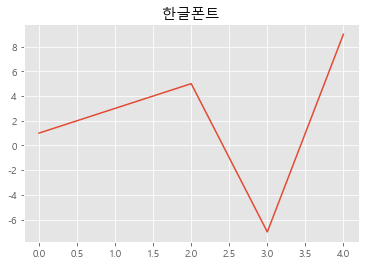

In [39]:
# 한글폰트 확인하기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트")

## 한 개의 변수 빈도수 구하고 시각화 하기
* Keyword

    * Series.value_counts()
    * Series.value_counts().plot()
    * Series.value_counts().plot.bar()
    * Series.value_counts().plot.barh()
    * sns.countplot()

### Market

* KOSPI (Korea Composite Stock Price Index) 
    * 우리나라의 종합주가지수(KOSPI)는 증권거래소가 1964.1.4일을 기준시점으로 다우존스식 주가평균을 지수화한 수정주가 평균지수를 산출, 발표하기 시작하였다. 다우존스식 주가지수는 주가지수를 구성하는 상장종목 중 일부 우량주만을 선정하여 산출하는 방식이다. 시가총액식 주가지수는 일정시점의 시가총액과 현재시점의 시가총액을 대비, 현재의 주가수준을 판단하는 방식이다. 즉, 지난 1980년 1월 4일 기준 상장종목 전체의 시가총액을 100으로 보고 현재 상장종목들의 시가총액이 어느 수준에 놓여 있는지를 보여주는 시스템이다.
    * 종합주가지수 = (비교시점의 시가총액 ÷ 기준시점의 시가총액) × 100
    * 출처 : [네이버 지식백과] 종합주가지수 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=72147&cid=43667&categoryId=43667


* KOSDAQ (Korea Securities Dealers Automated Quotation) 
    * 미국의 나스닥(NASDAQ)을 한국식으로 합성한 용어로 1996년 7월 1일 증권업협회와 증권사들이 설립한 코스닥증권(주)에 의하여 개설되었다. 코스닥의 개장으로 단순히 증권거래소 상장을 위한 예비적 단계였던 장외시장이 미국의 나스닥(NASDAQ)과 같이 자금조달 및 투자시장으로 독립적인 역할을 수행하게 되었다. 이후 2005년 1월 유가증권시장, 코스닥시장, 선물시장이 증권선물거래소(현 한국거래소)로 통합됨에 따라 코스닥시장도 거래소가 개설한 정규시장으로 편입되었다. 코스닥은 유가증권시장에 비해 진입요건이 상대적으로 덜 까다롭기 때문에 주로 중소벤처기업들이 상장되어 있다.
    * 출처 : [네이버 지식백과] KOSDAQ (매일경제, 매경닷컴) https://terms.naver.com/entry.nhn?docId=18639&cid=43659&categoryId=43659


* KONEX(Korea New Exchange) : 
    * 일정 요건을 갖춘 비상장 기업에 문호를 개방하기 위해 개설하는 유가증권시장, 코스닥시장에 이은 제3의 주식시장을 일컫는다. 코넥스시장은 우수한 기술력을 보유하고 있음에도 불구하고, 짧은 경력 등을 이유로 자금 조달에 어려움을 겪는 초기 중소기업과 벤처기업이 자금을 원활하게 조달할 수 있도록 하기 위해 설립된 자본시장으로, 2013년 7월 1일 개장되었다. 
    * 출처 : [네이버 지식백과] 코넥스 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=1006691&cid=43667&categoryId=43667

In [40]:
# Market column에 어떤 데이터들이 있는지 unique로 확인합니다.
df["Market"].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [41]:
# value_counts()로 빈도수를 구합니다.
df["Market"].value_counts()

KOSPI     4920
KOSDAQ    1552
KONEX      131
Name: Market, dtype: int64

<AxesSubplot:>

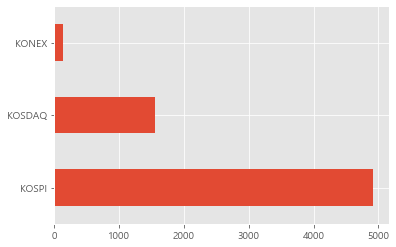

In [42]:
# 빈도수를 시각화 합니다.
df["Market"].value_counts().plot.barh()

<AxesSubplot:xlabel='count', ylabel='Market'>

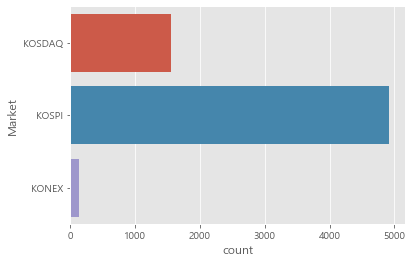

In [43]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
sns.countplot(data=df, y="Market")

### Sector

In [44]:
# 섹터의 빈도수를 구합니다.
# 상위 30개 섹터의 빈도수를 sector_count_top 변수에 할당합니다.
# sector_count_top
sector_count_top = df["Sector"].value_counts().head(30)

In [45]:
# df_sector_30
df_sector_30 = df[df["Sector"].isin(sector_count_top.index)]

<AxesSubplot:xlabel='count', ylabel='Sector'>

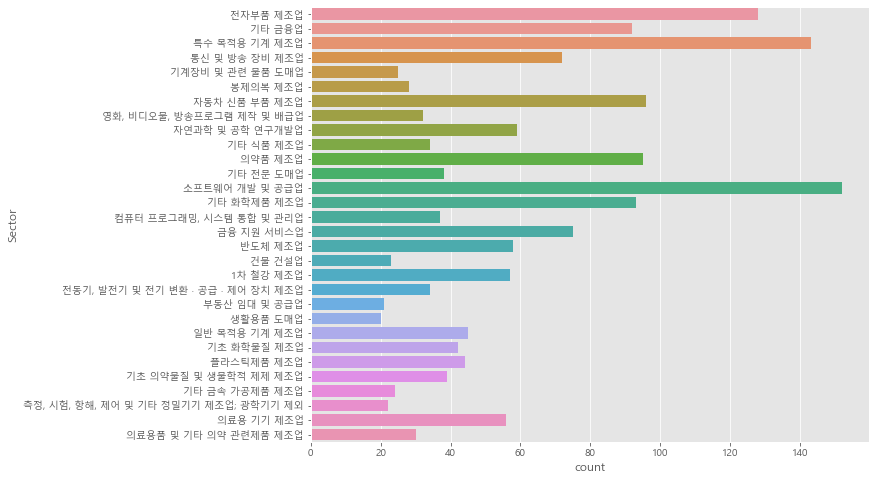

In [46]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
plt.figure(figsize=(10,8))
sns.countplot(data=df_sector_30, y="Sector")

In [47]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

Text(0.5, 1.0, '섹터별 빈도수')

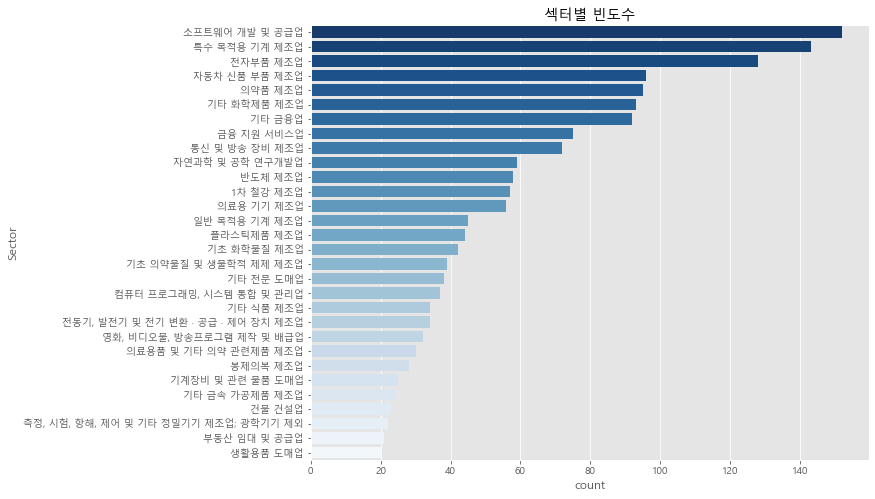

In [48]:
# 빈도수가 가장 많은 데이터 색인하기
plt.figure(figsize=(10,8))
sns.countplot(data=df_sector_30, y="Sector", palette="Blues_r",
              order=sector_count_top.index).set_title("섹터별 빈도수")

### Industry

In [51]:
# Industry 의 빈도수를 구합니다.
# industry_top30
industry_count_top = df["Industry"].value_counts().head(30)
industry_count_top.index

Index(['기업인수합병', '지주회사', '지주사업', '모바일게임', '화장품', '기업인수 및 합병', '기업 인수 및 합병',
       '합병', '부동산투자', '-', '금융 지원 서비스', '건강기능식품', '도급공사', '의약품', '금융 지원 서비스업',
       '증권업', '벤처캐피탈', '자동차부품', '셋톱박스', '금융지원 서비스', '금융지원서비스', '금융지주회사', '주정',
       '기업인수목적', '의료정보시스템', '디지털셋톱박스', '부동산 임대업', '부동산 투자 및 관리', '화장품 유통',
       '관이음쇠'],
      dtype='object')

In [52]:
df_industry_30 = df[df["Industry"].isin(industry_count_top.index)]

<AxesSubplot:xlabel='count', ylabel='Industry'>

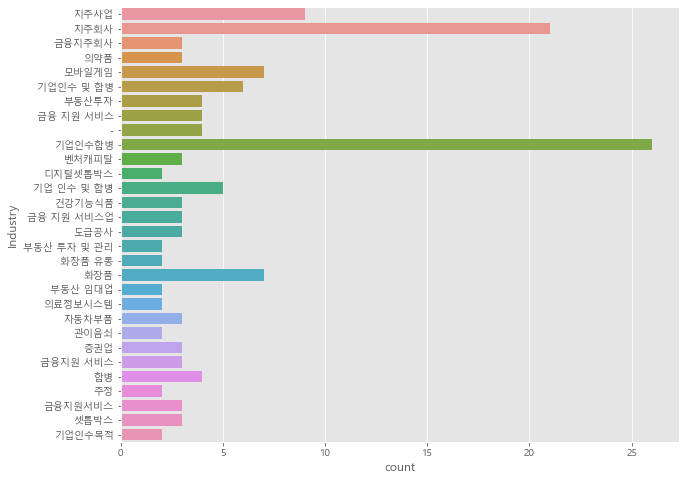

In [128]:
# Industry 빈도수를 pandas 의 plot 기능을 사용해 시각화 합니다.
plt.figure(figsize=(10,8))
sns.countplot(data=df_industry_30, y="Industry")

In [51]:
# df[df["Industry"].isin(industry_top30.index)]

Text(0.5, 1.0, '인더스트리 빈도수')

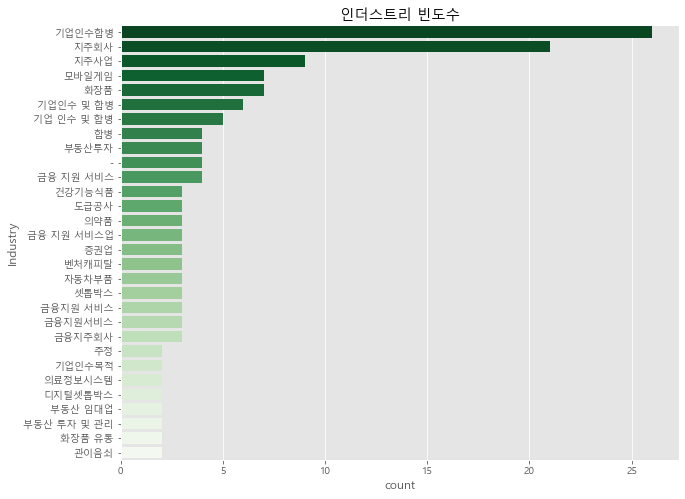

In [53]:
# seaborn
plt.figure(figsize=(10,8))
sns.countplot(data=df_industry_30, y="Industry", palette="Greens_r", order=industry_count_top.index).set_title("인더스트리 빈도수")

### Region 

In [54]:
# Region 의 빈도수를 구합니다.
# value_counts()통해 지역별 상장회사의 빈도수를 봅니다.
df["Region"].value_counts()

서울특별시      1011
경기도         699
충청남도         98
경상남도         90
인천광역시        87
충청북도         86
부산광역시        77
경상북도         65
대구광역시        53
대전광역시        52
전라북도         28
강원도          27
울산광역시        26
전라남도         22
광주광역시        22
세종특별자치시      10
제주특별자치도       9
홍콩            8
미국            6
케이맨 제도        5
일본            3
싱가포르          1
Name: Region, dtype: int64

<AxesSubplot:>

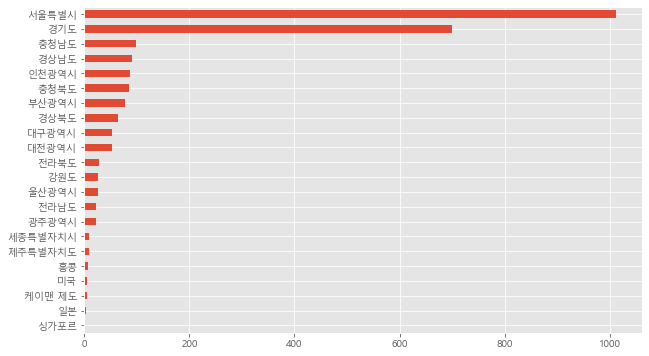

In [57]:
# df["Region"]
df["Region"].value_counts().sort_values().plot.barh(
    figsize=(10,6))

<AxesSubplot:xlabel='count', ylabel='Region'>

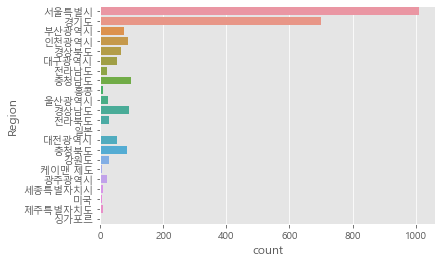

In [58]:
# Region 의 빈도수를 seaborn 의 countplot 으로 그립니다.
sns.countplot(data=df, y="Region")

Text(0.5, 1.0, '지역별 상장 종목 수')

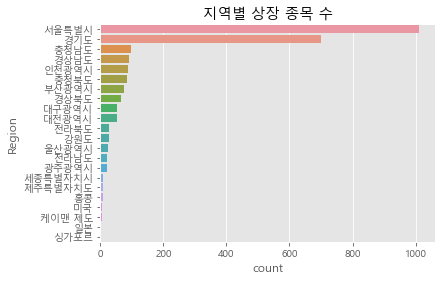

In [60]:
# order 기능을 통해 빈도수를 정렬합니다.
# df["Region"].value_counts().index 로 Region 의 순서를 가져와서 지정합니다.
sns.countplot(data=df, y="Region", order=df["Region"].value_counts().index).set_title("지역별 상장 종목 수")

Text(0.5, 1.0, '지역별 상장 종목 수')

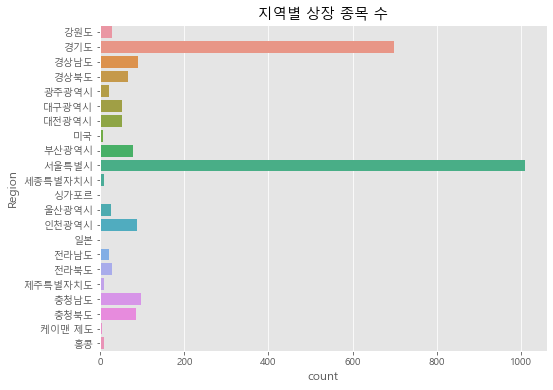

In [61]:
# Region 을 기준으로 정렬합니다.
plt.figure(figsize=(8,6))
sns.countplot(data=df.sort_values("Region"), y="Region").set_title("지역별 상장 종목 수")

## 두 개의 변수 빈도수 구하고 시각화 하기
* crosstab 으로 빈도수 구하기
* seaborn의 countplot 으로 빈도수 시각화
* pandas의 plot 기능으로 시각화
    * lineplot : 연속된 데이터(숫자, 기간)
    * barplot : 비연속 데이터(범주형)
    * hist : 연속된 수치 데이터의 범주화

### 지역별 상장 시장 종목 빈도수 구하기
* pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기

In [63]:
# pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기
# Market 과 Region 으로 빈도수 구하기
pd.crosstab(df["Market"], df["Region"])

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,7,32,1,5,4,1,7,0,2,49,...,0,4,0,3,1,1,4,9,0,0
KOSDAQ,16,517,47,40,9,31,38,6,39,541,...,9,58,3,12,15,2,68,62,4,8
KOSPI,4,150,42,20,9,21,7,0,36,421,...,17,25,0,7,12,6,26,15,1,0


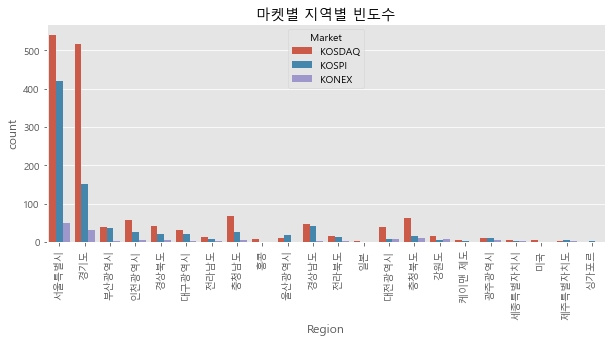

In [71]:
# countplot : Market 과 Region 으로 빈도수 시각화 하기
plt.figure(figsize=(10,4))
plt.xticks(rotation=90)
g = sns.countplot(data=df, x="Region", hue="Market").set_title("마켓별 지역별 빈도수")

### 연도별 상장 종목 빈도수 분석

In [77]:
# Market, ListingYear 빈도수 구하기
# market_year
market_year = pd.crosstab(df["Market"], df["ListingYear"])

### seaborn을 통한 빈도수 시각화

<AxesSubplot:xlabel='ListingYear', ylabel='count'>

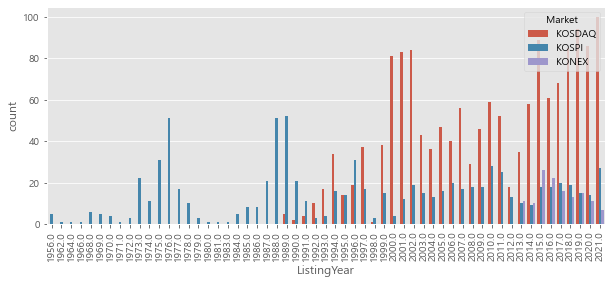

In [75]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
# hue 를 사용해 다른 변수를 함께 표현합니다. hue는 색상을 의미합니다.
plt.figure(figsize=(10,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x="ListingYear", hue="Market")

### Pandas를 통한 시각화

<AxesSubplot:title={'center':'연도별 상장 종목 수'}, xlabel='ListingYear'>

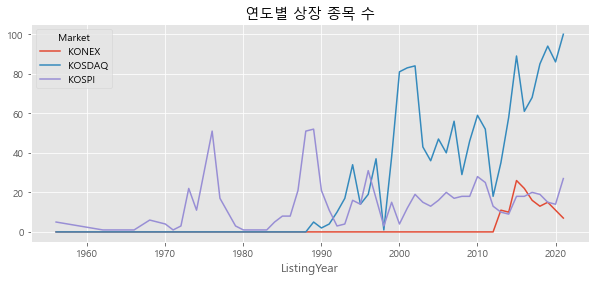

In [83]:
# Pandas plot 기능 활용하여 기본 그래프(line)를 그립니다.
# Pandas plot으로 그릴 때 x축에 인덱스 값이 y축에는 컬럼에 있는 값이 들어갑니다.
# 컬럼이 여러개라면 다른 색상으로 그려집니다.
market_year.T.plot(figsize=(10,4), title="연도별 상장 종목 수")

array([<AxesSubplot:xlabel='ListingYear'>,
       <AxesSubplot:xlabel='ListingYear'>,
       <AxesSubplot:xlabel='ListingYear'>], dtype=object)

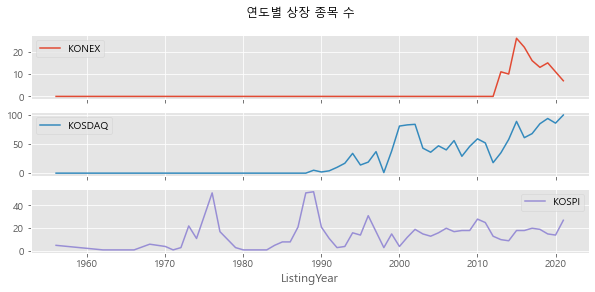

In [85]:
# 컬럼값을 subplots 으로 그립니다.
market_year.T.plot(figsize=(10,4), title="연도별 상장 종목 수", subplots=True)

<AxesSubplot:title={'center':'마켓 연도별 상장 종목 수'}, xlabel='ListingYear'>

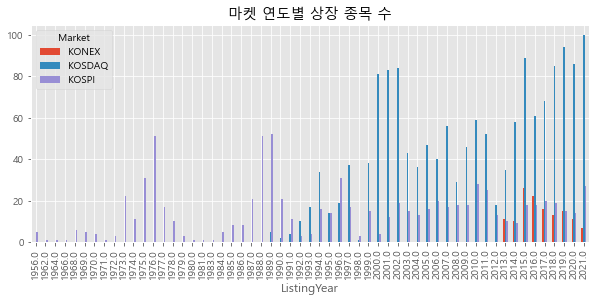

In [88]:
# Pandas plot 기능 활용하여 막대 그래프(bar, barh)를 그립니다.
market_year.T.plot.bar(figsize=(10,4), title="마켓 연도별 상장 종목 수")

In [93]:
# 컬럼명의 데이터 타입을 int 형태로 변경합니다.
market_year.columns = market_year.columns.astype(int)
market_year

ListingYear,1956,1962,1964,1966,1968,1969,1970,1971,1972,1973,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,11,10,26,22,16,13,15,11,7
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,18,35,58,89,61,68,85,94,86,100
KOSPI,5,1,1,1,6,5,4,1,3,22,...,13,10,9,18,18,20,19,15,14,27


<AxesSubplot:xlabel='ListingYear'>

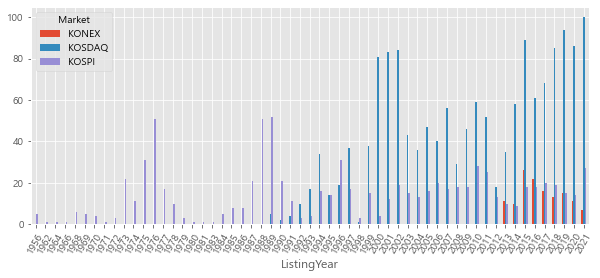

In [99]:
# 막대(bar)그래프 그리기
# market_year
market_year.T.plot.bar(figsize=(10,4), rot=60)

### groupby 와 pivot_table로 빈도수 구하기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/06_valuecounts.svg">

* [How to calculate summary statistics? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html)
* [Group by: split-apply-combine — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
* [pandas.pivot_table — pandas 1.2.0 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [137]:
# groupby([인덱스 컬럼 리스트])[연산에 사용할 컬럼].연산()
market_year = df.groupby(["Market", "ListingYear"])["Symbol"].count()
market_year

Market  ListingYear
KONEX   2013.0         11
        2014.0         10
        2015.0         26
        2016.0         22
        2017.0         16
                       ..
KOSPI   2017.0         20
        2018.0         19
        2019.0         15
        2020.0         14
        2021.0         27
Name: Symbol, Length: 99, dtype: int64

In [138]:
market_year.unstack().fillna(0).astype(int)

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,11,10,26,22,16,13,15,11,7
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,18,35,58,89,61,68,85,94,86,100
KOSPI,5,1,1,1,6,5,4,1,3,22,...,13,10,9,18,18,20,19,15,14,27


In [139]:
# pivot_table로 같은 결과가 나오게 연산하기
pd.pivot_table(data=df, index=["Market"], 
               columns="ListingYear", 
               values="Symbol", aggfunc="count", fill_value=0)

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,11,10,26,22,16,13,15,11,7
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,18,35,58,89,61,68,85,94,86,100
KOSPI,5,1,1,1,6,5,4,1,3,22,...,13,10,9,18,18,20,19,15,14,27


<AxesSubplot:xlabel='ListingYear', ylabel='count'>

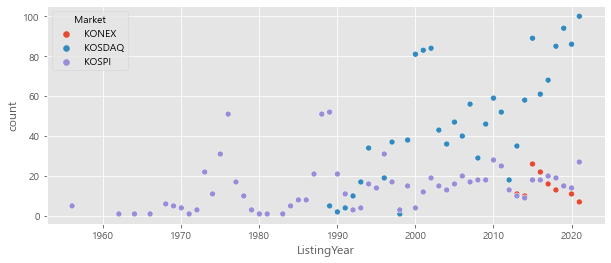

In [149]:
# 위의 groupby 결과를 scatterplot으로 그립니다.
# df_market_year
df_market_year = market_year.reset_index()
df_market_year = df_market_year.rename(columns={"Symbol":"count"})
plt.figure(figsize=(10,4))
sns.scatterplot(data=df_market_year, x="ListingYear", y="count", hue="Market")

<AxesSubplot:xlabel='ListingYear', ylabel='count'>

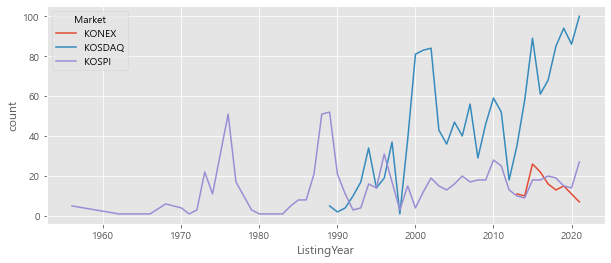

In [155]:
# lineplot 그리기
plt.figure(figsize=(10,4))
sns.lineplot(data=df_market_year, x="ListingYear", y="count", hue="Market", ci=None)

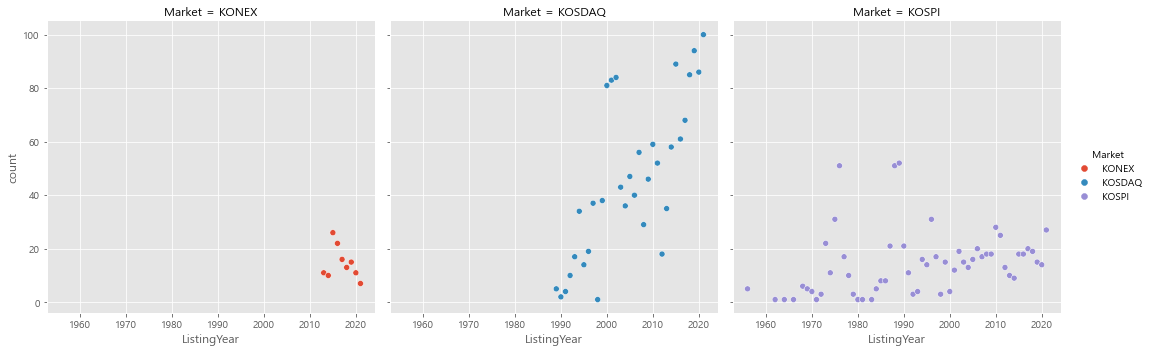

In [161]:
# relplot으로 subplot 그리기 - scatter
sns.relplot(data=df_market_year, x="ListingYear", y="count", hue="Market", col="Market")

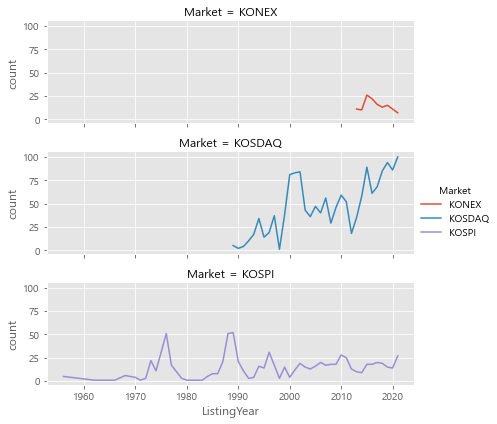

In [165]:
# relplot으로 subplot 그리기 - line

sns.relplot(data=df_market_year, x="ListingYear", y="count",
            hue="Market", row="Market", kind="line", height=2, aspect=3)

### 구간화 binnig 과 히스토그램
* 연속된 수치 데이터를 범주형 데이터로 표현, bucketing 이라고 부르기도 함
* 히스토그램 : 도수분포를 그래프 형태로 표현한 것
* 막대그래프와 비슷해 보이지만 다른 그래프
* 참고 : [히스토그램 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8)

In [175]:
df["ListingYear"].describe()

count    2485.000000
mean     2005.536821
std        12.872374
min      1956.000000
25%      1999.000000
50%      2008.000000
75%      2016.000000
max      2021.000000
Name: ListingYear, dtype: float64

<AxesSubplot:ylabel='Frequency'>

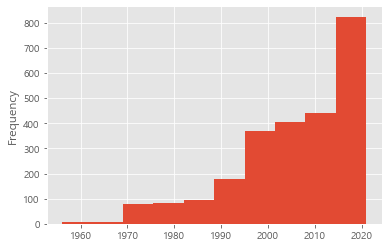

In [180]:
df["ListingYear"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

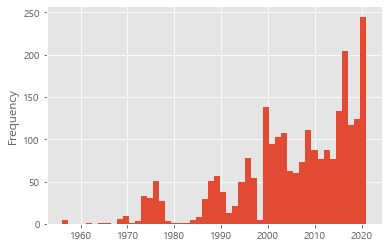

In [179]:
# bins 의 갯수에 따라 그래프의 표현 방법이 달라집니다.
df["ListingYear"].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

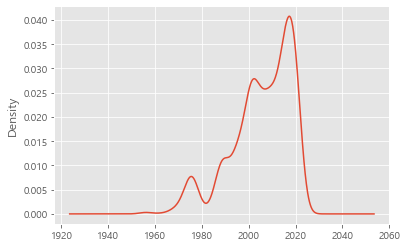

In [181]:
df["ListingYear"].plot.kde()

## 데이터 색인

In [185]:
# 케이맨 제도에 있는 회사 찾기
df[df["Region"] == "케이맨 제도"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
1912,900280,KOSDAQ,골든센츄리,기타 금융업,트랙터용 휠 및 타이어,2016-10-19,12월,주승화,http://www.jsj-wheel.co.kr,케이맨 제도,2016.0
1946,900070,KOSDAQ,글로벌에스엠,기타 금융업,"자회사 제품 : IT기기용 정밀 화스너부품(스크류, 샤프트, 스프링)",2009-12-23,12월,나윤복,http://www.globalsmtech.com,케이맨 제도,2009.0
4046,900120,KOSDAQ,씨케이에이치,기타 금융업,건강보조식품,2010-03-31,06월,린진성,NaN,케이맨 제도,2010.0
4306,900140,KOSPI,엘브이엠씨홀딩스,자동차 판매업,지주회사,2010-11-30,12월,"오세영, 노성석, 김선발 (각자 대표이사)",http://www.lvmcholdings.net,케이맨 제도,2010.0
4958,900250,KOSDAQ,크리스탈신소재,기타 금융업,"합성운모 플레이크, 파우더, 테이프",2016-01-28,12월,다이중치우 (DAI ZHONG QIU),http://www.crystalnewmaterial.com,케이맨 제도,2016.0


In [190]:
# 1970년 이전에 상장한 기업을 찾습니다.
df[df["ListingYear"] < 1970]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
60,000120,KOSPI,CJ대한통운,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,강신호,http://www.cjlogistics.com,서울특별시,1956.0
82,001530,KOSPI,DI동일,상품 중개업,"면사,화섬사,면포,혼방포,스포츠웨어용 신합섬 제조,도매,수출",1964-01-04,12월,"서태원, 손재선",http://www.dong-il.com,서울특별시,1964.0
1575,004250,KOSPI,NPC,플라스틱제품 제조업,"산업용기프라스틱제품(플라스틱 파렛트,시트 파렛트) 제조,판매",1969-09-08,12월,최병민,http://www.npc.co.kr,경기도,1969.0
1894,000050,KOSPI,경방,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시,1956.0
2175,001440,KOSPI,대한전선,절연선 및 케이블 제조업,"전력선,통신케이블,적산계기,스텐레스압연제품,광케이블,초고압선,알루미늄 제조,도매/전기공사",1968-12-27,12월,나형균,http://www.taihan.com,경기도,1968.0
2177,001790,KOSPI,대한제당,"곡물가공품, 전분 및 전분제품 제조업","제당,가축용 배합사료,설탕,기능성감미료(자일로올리고당),외식산 제조,도소매/부동산 임대",1968-12-27,12월,김기영,http://www.ts.co.kr,인천광역시,1968.0
2180,003490,KOSPI,대한항공,항공 여객 운송업,"여객운송,화물운송,항공기 제조,판매,정비수리/기내식 제조판매,면세품 판매",1966-03-18,12월,"조원태, 우기홍",http://www.koreanair.com,서울특별시,1966.0
2469,000060,KOSPI,메리츠화재,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시,1956.0
3620,000070,KOSPI,삼양홀딩스,기타 금융업,"지주회사,경영자문컨설팅",1968-12-27,12월,"엄태웅, 윤재엽",http://www.samyang.com,서울특별시,1968.0
3719,002420,KOSPI,세기상사,"영화, 비디오물, 방송프로그램 제작 및 배급업","극장(영화상영)/극영화,만화영화 제조/음식료품,일용잡화 소매/부동산 임대",1968-12-27,12월,조영준,http://daehancinema.com,서울특별시,1968.0


In [76]:
# and => &
# or  => |
True and True

True

In [212]:
# 2020년 상장한 서울특별시에 소재한 코스피 종목을 찾습니다.
df["ListingYear"] == 2020
seoul = df["Region"] == "서울특별시"
kospi = df["Market"] == "KOSPI"
df.loc[(df["ListingYear"] == 2020) 
       & seoul 
       & kospi, ["Name", "Symbol"]]

,Name,Symbol
98,ESR켄달스퀘어리츠,365550
1218,KCC글라스,344820
3406,미래에셋맵스리츠,357250
4253,에이플러스에셋,244920
4602,이지스레지던스리츠,350520
4607,이지스밸류리츠,334890
4709,제이알글로벌리츠,348950
4884,코람코에너지리츠,357120
5038,티와이홀딩스,363280
5203,하이브,352820


In [210]:
df[seoul & kospi & (df["ListingYear"] == 2020)]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
98,365550,KOSPI,ESR켄달스퀘어리츠,부동산 임대 및 공급업,부동산투자,2020-12-23,05월,박래익,http://www.esrks-reit.com,서울특별시,2020.0
1218,344820,KOSPI,KCC글라스,유리 및 유리제품 제조업,판유리 등,2020-01-21,12월,김내환,http://www.kccglass.co.kr,서울특별시,2020.0
3406,357250,KOSPI,미래에셋맵스리츠,부동산 임대 및 공급업,부동산 임대업,2020-08-05,11월,김호식,http://www.maps1reit.miraeasset.com,서울특별시,2020.0
4253,244920,KOSPI,에이플러스에셋,보험 및 연금관련 서비스업,보험대리 및 중개업,2020-11-20,12월,"곽근호, 서성식, 조규남",NaN,서울특별시,2020.0
4602,350520,KOSPI,이지스레지던스리츠,부동산 임대 및 공급업,"부동산투자, 취득, 매매, 임대",2020-08-05,06월,박영희,http://igisresidencereit.com/,서울특별시,2020.0
4607,334890,KOSPI,이지스밸류리츠,부동산 임대 및 공급업,"부동산투자, 취득, 매매, 임대",2020-07-16,08월,도병운,http://www.igisvaluereit.com,서울특별시,2020.0
4709,348950,KOSPI,제이알글로벌리츠,부동산 임대 및 공급업,벨기에 파이낸스 타워,2020-08-07,06월,오남수,http://jrglobalreit.com,서울특별시,2020.0
4884,357120,KOSPI,코람코에너지리츠,부동산 임대 및 공급업,부동산 투자 및 관리,2020-08-31,11월,이성균,http://www.koramcoenergyplus.co.kr,서울특별시,2020.0
5038,363280,KOSPI,티와이홀딩스,기타 금융업,지주사업,2020-09-22,12월,유종연,http://www.ty-holdings.co.kr,서울특별시,2020.0
5203,352820,KOSPI,하이브,오디오물 출판 및 원판 녹음업,"음악 기획/제작, 퍼블리싱, 아티스트 매니지먼트",2020-10-15,12월,박지원,http://www.bighitcorp.com,서울특별시,2020.0


### 지역별 섹터

In [216]:
# Sector, Region 으로 crosstab 연산을 합니다.
# df_sr
df_sr = pd.crosstab(df["Sector"], df["Region"])
df_sr

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
1차 비철금속 제조업,0,7,1,1,0,3,1,0,1,3,...,0,0,0,0,0,0,1,0,0,0
1차 철강 제조업,0,4,11,8,1,0,1,0,11,11,...,0,4,0,1,1,0,4,0,0,0
가구 제조업,0,4,0,0,0,0,0,0,0,3,...,0,1,0,0,0,0,0,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
가정용 기기 제조업,0,6,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
해상 운송업,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
"해체, 선별 및 원료 재생업",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
화학섬유 제조업,0,0,0,1,0,1,0,0,0,6,...,0,0,0,0,1,0,0,0,0,0


### 컬럼과 인덱스 값으로 색인하기

In [220]:
# 특정 컬럼만 가져오기
df_sr[["경기도", "서울특별시"]]

Region,경기도,서울특별시
Sector,,
1차 비철금속 제조업,7,3
1차 철강 제조업,4,11
가구 제조업,4,3
가전제품 및 정보통신장비 소매업,0,1
가정용 기기 제조업,6,1
...,...,...
해상 운송업,0,5
"해체, 선별 및 원료 재생업",1,0
화학섬유 제조업,0,6


### 특정 행만 가져오기

* .loc[행]
* .loc[행, 열]
* .loc[조건식, 열]

In [224]:
# df_sr에서 "소프트웨어 개발 및 공급업" 행만 가져오기
df_sr.loc["소프트웨어 개발 및 공급업"].sort_values(ascending=False)

Region
서울특별시      106
경기도         37
일본           2
충청북도         2
대전광역시        2
홍콩           1
경상남도         1
부산광역시        1
케이맨 제도       0
충청남도         0
제주특별자치도      0
전라북도         0
전라남도         0
강원도          0
인천광역시        0
울산광역시        0
세종특별자치시      0
미국           0
대구광역시        0
광주광역시        0
경상북도         0
싱가포르         0
Name: 소프트웨어 개발 및 공급업, dtype: int64

In [229]:
# loc 로 행인덱스 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업" 가져오기
df_sr.loc[["소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"]]

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
소프트웨어 개발 및 공급업,0,37,1,0,0,0,2,0,1,106,...,0,0,2,0,0,0,0,2,0,1
금융 지원 서비스업,0,1,0,0,0,0,0,0,0,74,...,0,0,0,0,0,0,0,0,0,0
의약품 제조업,5,34,1,0,0,0,2,0,1,40,...,0,2,0,0,0,0,2,6,0,0


In [232]:
# loc 로 행, 컬럼 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"
# 열에서 "서울특별시" 가져오기

df_sr.loc[["소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"], "서울특별시"]

Sector
소프트웨어 개발 및 공급업    106
금융 지원 서비스업         74
의약품 제조업            40
Name: 서울특별시, dtype: int64

In [235]:
# loc로 여러 행과 열 가져오기
df_sr.loc[["소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"], 
          ["서울특별시", "경기도", "부산광역시"]]

Region,서울특별시,경기도,부산광역시
Sector,,,
소프트웨어 개발 및 공급업,106,37,1
금융 지원 서비스업,74,1,0
의약품 제조업,40,34,1


<AxesSubplot:title={'center':'소프트웨어 개발 및 공급업 지역별 상장 빈도수'}, ylabel='Region'>

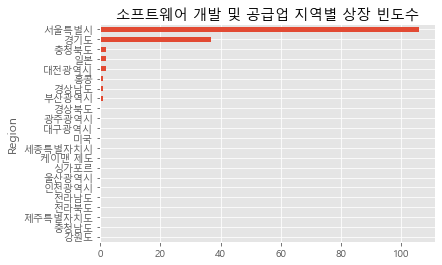

In [245]:
# "소프트웨어 개발 및 공급업" 만 가져와서 막대그래프를 그립니다.

df_sr.loc["소프트웨어 개발 및 공급업"].sort_values().plot.barh(
    title="소프트웨어 개발 및 공급업 지역별 상장 빈도수")

<AxesSubplot:title={'center':'의약품 제조업 소재지별 빈도수'}, ylabel='Region'>

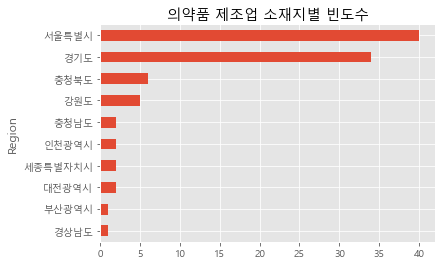

In [256]:
# "의약품 제조업" 만 가져와서 막대그래프를 그립니다.

drug = df_sr.loc["의약품 제조업"]
drug[drug > 0].sort_values().plot.barh(title="의약품 제조업 소재지별 빈도수")

In [260]:
# iloc[행]
# iloc[행,열]
df_sr.iloc[[0, 1], [0, 1]]

Region,강원도,경기도
Sector,,
1차 비철금속 제조업,0,7
1차 철강 제조업,0,4


In [267]:
df_sr.iloc[:5, :5]

Region,강원도,경기도,경상남도,경상북도,광주광역시
Sector,,,,,
1차 비철금속 제조업,0,7,1,1,0
1차 철강 제조업,0,4,11,8,1
가구 제조업,0,4,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0
가정용 기기 제조업,0,6,1,0,1


In [268]:
df_sr.iloc[-5:-2, -5:-2]

Region,제주특별자치도,충청남도,충청북도
Sector,,,
해상 운송업,0,0,0
"해체, 선별 및 원료 재생업",0,0,0
화학섬유 제조업,0,0,0


In [87]:
# df.head 혹은 tail도 내부에서 iloc를 슬라이싱으로 사용하고 있습니다.
# df.head??

In [271]:
df_sr.iloc[:, -10:].head()

Region,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,
1차 비철금속 제조업,0,0,0,0,0,0,1,0,0,0
1차 철강 제조업,0,4,0,1,1,0,4,0,0,0
가구 제조업,0,1,0,0,0,0,0,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0,0,0,0,0,0
가정용 기기 제조업,0,0,0,0,0,0,0,0,0,0


In [272]:
df_sr.iloc[:5, -10:]

Region,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,
1차 비철금속 제조업,0,0,0,0,0,0,1,0,0,0
1차 철강 제조업,0,4,0,1,1,0,4,0,0,0
가구 제조업,0,1,0,0,0,0,0,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0,0,0,0,0,0
가정용 기기 제조업,0,0,0,0,0,0,0,0,0,0


In [88]:
# df_sr.tail??